# Problem 1.1: Application Layer Rerouting

In [1]:
import itertools
import os
import re
import subprocess
import numpy
import matplotlib.pyplot as plt

## Config used to run/read rtt from ping

In [2]:
class Config(object):
    def __init__(self):
        super().__init__()

conf = Config()
conf.hosts = (
    'uni-due.de',
    'whitehouse.gov',
    'icmp.org',
)
conf.log = os.path.join(os.getcwd(), 'ping.stdout.log')
conf.num_pings = 100
conf.histogram_bins = 20

## Helper functions

Used to create and output statistics data

In [3]:
def __read_rtt(line: str):
    """
    Tries to read the ``time=...`` value with its unit that is normally output by a ping result.

    Example:
    
    ``64 bytes from addce0.uni-due.de (132.252.185.170): icmp_seq=1 ttl=121 time=19.7 ms``

    :param line: can be any string value
    :return: a dict with ``rtt`` and ``unit`` if a match in given line was found
    """
    m = re.search('time=(\d+(\.\d+)?)\s+(\w+)', line)
    if m:
        groups = m.groups()
        time = float(groups[0])
        unit = groups[2]
        return {
            'rtt': time,
            'unit': unit
        }


def __read_host(line: str):
    """
    Tries to read the host value of a string that is output by a ping line starting with ``PING``

    Example:

    ``PING uni-due.de (132.252.185.170) 56(84) bytes of data.``

    :param line: any string value
    :return: a hostname if one was found, None otherwise
    """
    m = re.search('^(PING\s)(\S+)', line)
    if m:
        groups = m.groups()
        return groups[1]

def __print_min_max_mean(iterable):
    print('{0:>12}: {1}'.format('Max', max(iterable)))
    print('{0:>12}: {1}'.format('Min', min(iterable)))
    print('{0:>12}: {1}'.format('Mean', numpy.round(numpy.mean(iterable), decimals=3)))
    

def __read_log():
    rtt_log = []
    with open(conf.log, mode='r') as log:
        current_host = None
        for line in log:
            rtt = __read_rtt(line)
            if rtt:
                rtt['host'] = current_host
                rtt_log.append(rtt)

            host = __read_host(line)
            if host:
                current_host = host
    return rtt_log

In [4]:
def create_histogram(log):
    times = [rtt['rtt'] for rtt in log]
    __print_min_max_mean(times)

    log = sorted(log, key=lambda t: t['host'])
    for k, g in itertools.groupby(log, key=lambda t: t['host']):
        print('-'.join(['' for i in range(0, 80)]))
        print('{0:>12}: {1}'.format('Host', k))
        print()
        __print_min_max_mean([rtt['rtt'] for rtt in g])

    plt.hist(times, conf.histogram_bins, normed=1, facecolor='orange', alpha=0.75)

    plt.xlabel('RTT')
    plt.ylabel('Probability')
    plt.title('Histogram of round trip times')
    # plt.axis([min(times), max(times), 0, 0.03])
    plt.grid(True)
    plt.show()

## Statistics

Print min, max and mean rtt for the complete log and each configured host. Additionally a histogram is shown. 

         Max: 414.0
         Min: 17.4
        Mean: 84.865
-------------------------------------------------------------------------------
        Host: icmp.org

         Max: 414.0
         Min: 184.0
        Mean: 215.013
-------------------------------------------------------------------------------
        Host: uni-due.de

         Max: 111.0
         Min: 17.4
        Mean: 22.74
-------------------------------------------------------------------------------
        Host: whitehouse.gov

         Max: 127.0
         Min: 35.4
        Mean: 43.909


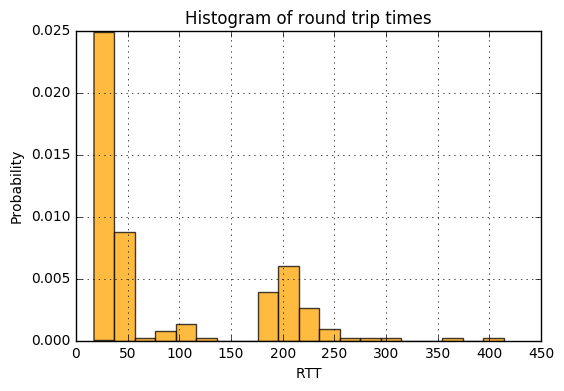

In [5]:
log = __read_log()
create_histogram(log)